# New Commercial opening
# Analysis of Province of Milan
## A. Introduction
### A.1. Description background and problem
The number of foreign catering companies in the province of Milan has grown considerably in recent years. According to a report prepared by the *Camera Commercio Milano*, in the province the foreign catering companies from 2011 to 2016 increased by 53.7%.

We can consider a new foreign entrepreneur that wants to invest his wealth in the catering sector by opening a new restaurant. In particular, he wants to open his own restaurant in the province of Milan, excluding the city of Milan where the market is already saturated. Furthermore, the entrepreneur has not yet decided whether to open a restaurant (Italian or ethnic cuisine), a pub, a pizza or a fast food restaurant and for this reason he has commissioned the development of a study to identify the best place for this new opening.
### A.2. Data

The data used for this study refer to: 
* a database containing the municipalities of the province of Milan (extracted from a database containing all Italian municipalities:  https://rosariociaglia.altervista.org/file/comuni_italiani.csv);
* a database of the geographical coordinates of all the municipalities of the province of Milan (http://www.dossier.net/utilities/coordinate-geografiche/provincia-milano.htm).

These geographical coordinates have been used as a reference point to identify all the most common venues within a radius of 6 km through the Foursquare service, taking into consideration only the activities of our interest (Restaurants, pubs, pizza and fast food restaurants). 

To choose the optimal place another database, elaborated by Regione Lombardia, (https://www.dati.lombardia.it/Statistica/CITTA-METROPOLITANA-MILANO-2019-Popolazione-Reside/u8k7-8q9s) was used relating to the population, by year of age, of the province of Milan as of 31/12/2019. In particular, it was assumed that:
* the population aged between 15 and 30 could correspond to the clientele of a fast food;
* the population aged 18-40 could correspond to the clientele of a pub or pizza restaurant;
* the population aged 40-65 could correspond to the clientele of a classic restaurant (Italian or ethnic).

Using the foursquare location data it was possible to verify the places where, for each defined typology, there was a lack of venues in relation to a specific age group.

## B. Methodology

First of all let's define our dataset. Starting from the list of all the Italian municipalities, we extract the data relating only to the province of Milan, adding to these the relative geographical coordinates.

In [2]:
import pandas as pd
df=pd.read_csv('comune_cap_pr_regione.csv', sep=';')
df.head()

,COMUNE,CAP,PROVINCIA,REGIONE
0,ABANO TERME BAGNI,35031,PD,Veneto
1,ABATEMARCO,84040,SA,Campania
2,ABAZIA DI SULMONA,67030,AQ,Abruzzo
3,ABBADIA ALPINA,10060,TO,Piemonte
4,ABBADIA CERRETO,26834,LO,Lombardia


In [3]:
#we extract the data relating only to the province of Milan
df=df.loc[df["PROVINCIA"]=="MI"]
df=df.reset_index(drop=True)
df.head()

,COMUNE,CAP,PROVINCIA,REGIONE
0,ABBIATEGRASSO,20081,MI,Lombardia
1,AFFORI,20161,MI,Lombardia
2,AGLIATE,20040,MI,Lombardia
3,AGRATE BRIANZA,20041,MI,Lombardia
4,AICURZIO,20040,MI,Lombardia


In [4]:
#adding the relative geographical coordinates.
geo=pd.read_csv("geo.csv", sep=";")
geo=geo.drop("Unnamed: 0", axis=1)
df=pd.merge(left=df, right=geo, on="COMUNE")
df.head()

,COMUNE,CAP,PROVINCIA,REGIONE,LATITUDINE,LONGITUDINE
0,ABBIATEGRASSO,20081,MI,Lombardia,45.393034,8.919825
1,ALBAIRATE,20080,MI,Lombardia,45.419605,8.935588
2,ARCONATE,20020,MI,Lombardia,45.539546,8.847940
3,ARESE,20020,MI,Lombardia,45.550170,9.078381
4,ARLUNO,20010,MI,Lombardia,45.505223,8.938870


Now we define the database relating to the population of the various municipalities of the province.

In [5]:
df_popul=pd.read_csv("CITTA_METROPOLITANA_MILANO_-_2019_Popolazione_Residente_per_eta__e_comune_al_31.12.csv", sep=";")
df_popul=df_popul.drop(["Comune"], axis=1)
df_popul=df_popul.set_index("COMUNE")
df_popul["Sum"]=df_popul.sum(axis=1)
df_popul=df_popul.reset_index()
df_popul.head()

,COMUNE,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,100_o_piu',Sum
0,ABBIATEGRASSO,243,212,261,280,285,283,325,334,303,...,63,43,36,21,17,14,8,5,8,32855
1,ALBAIRATE,28,44,30,39,32,28,42,39,37,...,12,7,8,2,0,4,5,0,0,4735
2,ARCONATE,54,60,45,47,65,74,56,61,65,...,4,3,5,3,1,2,1,0,0,6694
3,ARESE,116,119,126,163,169,166,182,181,171,...,36,32,22,17,9,3,10,4,8,19683
4,ARLUNO,112,118,102,120,119,137,124,139,115,...,26,14,17,4,10,2,4,2,1,12319


We can represent this database in a geographical map to check the distribution of the population in the province

In [6]:
df_pop_sum=df_popul[["COMUNE", "Sum"]]
df_pop_geo=pd.merge(left=df, right=df_pop_sum, on="COMUNE")
df_pop_geo.head()


,COMUNE,CAP,PROVINCIA,REGIONE,LATITUDINE,LONGITUDINE,Sum
0,ABBIATEGRASSO,20081,MI,Lombardia,45.393034,8.919825,32855
1,ALBAIRATE,20080,MI,Lombardia,45.419605,8.935588,4735
2,ARCONATE,20020,MI,Lombardia,45.539546,8.847940,6694
3,ARESE,20020,MI,Lombardia,45.550170,9.078381,19683
4,ARLUNO,20010,MI,Lombardia,45.505223,8.938870,12319


In [7]:
# create map
import folium
from geopy.geocoders import Nominatim
address = 'Province of Milan, Italy'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_prov_mil = folium.Map(location=[latitude, longitude], zoom_start=10)

In [8]:
# add markers to map
for lat, lng, label, pop in zip(df_pop_geo['LATITUDINE'], df_pop_geo['LONGITUDINE'], df_pop_geo['Sum'], df_pop_geo['COMUNE']):
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        tooltip=pop,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_prov_mil)  
    
map_prov_mil


Using geographic coordinates as reference points, we get the most common venues (max 100) in a 6 km radius using the Foursquare API.

In [9]:
CLIENT_ID = 'R0KOINKRFOMXVK51FNZODL2THJQJYHPRTIJBXTVM5DDCIBWE' #  Foursquare ID
CLIENT_SECRET = 'EZEZDW1I5ZQFL0CCYUTZWMWJUU0RH4UOTQ5THTYCLEHMP5K2' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
import json
import requests
from pandas.io.json import json_normalize

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=6000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
       
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Comune', 
                  'Comune Latitude', 
                  'Comune Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
milan_venues = getNearbyVenues(names=df['COMUNE'],
                                   latitudes=df['LATITUDINE'],
                                   longitudes=df['LONGITUDINE']
                                  )

ABBIATEGRASSO
ALBAIRATE
ARCONATE
ARESE
ARLUNO
ASSAGO
BARANZATE
BAREGGIO
BASIANO
BASIGLIO
BELLINZAGO LOMBARDO
BERNATE TICINO
BESATE
BINASCO
BOFFALORA SOPRA TICINO
BOLLATE
BRESSO
BUBBIANO
BUCCINASCO
BUSCATE
BUSSERO
BUSTO GAROLFO
CALVIGNASCO
CAMBIAGO
CANEGRATE
CARPIANO
CARUGATE
CASARILE
CASOREZZO
CASSANO D'ADDA
CASSINA DE' PECCHI
CASSINETTA DI LUGAGNANO
CASTANO PRIMO
CERNUSCO SUL NAVIGLIO
CERRO AL LAMBRO
CERRO MAGGIORE
CESANO BOSCONE
CESATE
CINISELLO BALSAMO
CISLIANO
COLOGNO MONZESE
COLTURANO
CORBETTA
CORMANO
CORNAREDO
CORSICO
CUGGIONO
CUSAGO
CUSANO MILANINO
DAIRAGO
DRESANO
GAGGIANO
GARBAGNATE MILANESE
GESSATE
GORGONZOLA
GREZZAGO
GUDO VISCONTI
INVERUNO
INZAGO
LACCHIARELLA
LAINATE
LEGNANO
LISCATE
MAGENTA
MAGNAGO
MARCALLO CON CASONE
MASATE
MEDIGLIA
MELEGNANO
MELZO
MESERO
MILANO
MORIMONDO
MOTTA VISCONTI
NERVIANO
NOSATE
NOVATE MILANESE
NOVIGLIO
OPERA
OSSONA
OZZERO
PADERNO DUGNANO
PANTIGLIATE
PARABIAGO
PAULLO
PESCHIERA BORROMEO
PESSANO CON BORNAGO
PIEVE EMANUELE
PIOLTELLO
POGLIANO MILANESE
POZ

In [25]:
milan_venues.head()

,Comune,Comune Latitude,Comune Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ABBIATEGRASSO,45.393034,8.919825,Pasticceria Besuschio,45.398857,8.916467,Dessert Shop
1,ABBIATEGRASSO,45.393034,8.919825,Ristorante Impero,45.397120,8.919910,Chinese Restaurant
2,ABBIATEGRASSO,45.393034,8.919825,Piazza Castello,45.398642,8.919419,Plaza
3,ABBIATEGRASSO,45.393034,8.919825,'A Livella,45.399039,8.917685,Pizza Place
4,ABBIATEGRASSO,45.393034,8.919825,Tête-a-Thè,45.397560,8.919040,Tea Room


In [15]:
print ("In this database there are {} different venues.".format(milan_venues.shape[0]))

In this database there are 9760 different venues.


From this we extract a new database with only the venue categories in which we are interested: 
* Restaurant
* Pizza
* Pub
* Fast Food


In [16]:
milan_food=milan_venues.loc[milan_venues["Venue Category"].str.contains("Fast Food") | milan_venues["Venue Category"].str.contains("Restaurant") | milan_venues["Venue Category"].str.contains("Pizza") | milan_venues["Venue Category"].str.contains("Pub")]
milan_food=milan_food.replace({"Fast Food Restaurant":"Fast Food"}, regex=True)
milan_food.head()

,Comune,Comune Latitude,Comune Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,ABBIATEGRASSO,45.393034,8.919825,Ristorante Impero,45.397120,8.919910,Chinese Restaurant
3,ABBIATEGRASSO,45.393034,8.919825,'A Livella,45.399039,8.917685,Pizza Place
8,ABBIATEGRASSO,45.393034,8.919825,Ristorante Pizzeria da Marita,45.400170,8.910980,Pizza Place
11,ABBIATEGRASSO,45.393034,8.919825,Molino Santa Marta,45.425138,8.869623,Italian Restaurant
12,ABBIATEGRASSO,45.393034,8.919825,Cascina Selva,45.365680,8.924080,Italian Restaurant


In [17]:
print ("In this database there are {} different venues.".format(milan_food.shape[0]))

In this database there are 3461 different venues.


Now we can calculate how many venues of this types are present in each municipality.

In [18]:
milan_food_venues=milan_food.groupby("Comune").count().reset_index()
milan_food_venues=milan_food_venues.drop(["Comune Latitude", "Comune Longitude", "Venue Category", "Venue Latitude", "Venue Longitude"], axis=1)
milan_food_venues

,Comune,Venue
0,ABBIATEGRASSO,20
1,ALBAIRATE,22
2,ARCONATE,14
3,ARESE,29
4,ARLUNO,27
...,...,...
127,VIMODRONE,36
128,VITTUONE,27
129,VIZZOLO PREDABISSI,25
130,ZELO SURRIGONE,25


In [19]:
milan_food_venues.loc[milan_food_venues["Comune"]=="CESANO BOSCONE"]

,Comune,Venue
36,CESANO BOSCONE,34


In [20]:
milan_food_venues.loc[milan_food_venues["Comune"]=="TREZZANO SUL NAVIGLIO"]

,Comune,Venue
115,TREZZANO SUL NAVIGLIO,23


In particular we can define what specific type of venue is present in each municipality ..

In [21]:
milan_onehot = pd.get_dummies(milan_food[['Venue Category']], prefix="", prefix_sep="")


milan_onehot['Comune'] = milan_food['Comune'] 

fixed_columns = [milan_onehot.columns[-1]] + list(milan_onehot.columns[:-1])
milan_onehot = milan_onehot[fixed_columns]

milan_onehot.head()

,Comune,Abruzzo Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Brazilian Restaurant,Campanian Restaurant,...,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,ABBIATEGRASSO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABBIATEGRASSO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ABBIATEGRASSO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,ABBIATEGRASSO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,ABBIATEGRASSO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
milan_grouped=milan_onehot.groupby("Comune").mean().reset_index()
milan_grouped.head()

,Comune,Abruzzo Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Brazilian Restaurant,Campanian Restaurant,...,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,ABBIATEGRASSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,ALBAIRATE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,ARCONATE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,ARESE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068966,0.0,0.0,0.103448,0.0,0.0,0.0,0.0,0.034483,0.0
4,ARLUNO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.074074,0.0,0.0,0.0,0.0,0.000000,0.0


..and the five major types of venues for each municipality.

In [23]:
num_top_venues = 5

for com in milan_grouped['Comune']:
    print("----"+com+"----")
    temp = milan_grouped[milan_grouped['Comune'] == com].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ABBIATEGRASSO----
                venue  freq
0  Italian Restaurant  0.35
1         Pizza Place  0.20
2          Restaurant  0.20
3           Fast Food  0.10
4                 Pub  0.05


----ALBAIRATE----
                venue  freq
0  Italian Restaurant  0.36
1         Pizza Place  0.27
2          Restaurant  0.14
3           Fast Food  0.09
4                 Pub  0.09


----ARCONATE----
                  venue  freq
0    Italian Restaurant  0.50
1           Pizza Place  0.43
2            Restaurant  0.07
3    Abruzzo Restaurant  0.00
4  Sardinian Restaurant  0.00


----ARESE----
                venue  freq
0         Pizza Place  0.31
1  Italian Restaurant  0.17
2    Sushi Restaurant  0.10
3           Fast Food  0.07
4                 Pub  0.07


----ARLUNO----
                venue  freq
0         Pizza Place  0.30
1                 Pub  0.19
2  Italian Restaurant  0.19
3          Restaurant  0.11
4    Sushi Restaurant  0.07


----ASSAGO----
                venue  freq
0        

For each category of venues (Fast food, pub or pizza restaurant, restaurant) we are interested, as mentioned, in a specific age group of the population. For this reason we have created a new population database, containing the percentage weight of each age group in relation to the total inhabitants for each municipality.

In [24]:
df_pop=df_popul.drop(["Sum"], axis=1)
df_pop=df_pop.set_index("COMUNE")
df_pop=df_pop.div(df_pop.sum(axis=1),axis=0)
df_pop["Total"]=df_pop.sum(axis=1)
df_pop=df_pop.reset_index()

df_pop.head()

,COMUNE,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,100_o_piu',Total
0,ABBIATEGRASSO,0.007396,0.006453,0.007944,0.008522,0.008674,0.008614,0.009892,0.010166,0.009222,...,0.001918,0.001309,0.001096,0.000639,0.000517,0.000426,0.000243,0.000152,0.000243,1.0
1,ALBAIRATE,0.005913,0.009293,0.006336,0.008237,0.006758,0.005913,0.008870,0.008237,0.007814,...,0.002534,0.001478,0.001690,0.000422,0.000000,0.000845,0.001056,0.000000,0.000000,1.0
2,ARCONATE,0.008067,0.008963,0.006722,0.007021,0.009710,0.011055,0.008366,0.009113,0.009710,...,0.000598,0.000448,0.000747,0.000448,0.000149,0.000299,0.000149,0.000000,0.000000,1.0
3,ARESE,0.005893,0.006046,0.006401,0.008281,0.008586,0.008434,0.009247,0.009196,0.008688,...,0.001829,0.001626,0.001118,0.000864,0.000457,0.000152,0.000508,0.000203,0.000406,1.0
4,ARLUNO,0.009092,0.009579,0.008280,0.009741,0.009660,0.011121,0.010066,0.011283,0.009335,...,0.002111,0.001136,0.001380,0.000325,0.000812,0.000162,0.000325,0.000162,0.000081,1.0


In [25]:
col1=["15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30"]
col2=["18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37",'38','39','40']
col3=['40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65']
df_pop["15-30"]=df_pop[col1].sum(axis=1)
df_pop["18-40"]=df_pop[col2].sum(axis=1)
df_pop["40-65"]=df_pop[col3].sum(axis=1)
df_pop_group=df_pop[["COMUNE","15-30","18-40","40-65"]]
df_pop_group=df_pop_group.rename(columns={"COMUNE":"Comune"})
df_pop_group.head()

,Comune,15-30,18-40,40-65
0,ABBIATEGRASSO,0.151666,0.238107,0.390443
1,ALBAIRATE,0.161352,0.228722,0.419852
2,ARCONATE,0.149388,0.233941,0.403496
3,ARESE,0.142610,0.201595,0.375959
4,ARLUNO,0.144736,0.247504,0.394188


At this point we can begin our analysis for each type of venue:
* Fast food
* Pub or Pizza restaurant
* Restaurant

#### Fast food

We create a new database where, for each municipality, we define the number of fast food and and the population present by age group.

In [26]:
milan_fast=milan_food.loc[milan_food["Venue Category"].str.contains("Fast Food")]
milan_fast=milan_fast.groupby("Comune").count()
milan_fast=milan_fast.reset_index()
milan_ff_pop=pd.merge(left=milan_fast, right=df_pop_group, on="Comune")
milan_ff_pop=milan_ff_pop.drop(["Comune Latitude", "Comune Longitude", "Venue Latitude", "Venue Longitude", "Venue Category"], axis=1)
milan_ff_pop=milan_ff_pop.rename(columns={"Venue":"Fast Food"})
milan_ff_pop.head()

,Comune,Fast Food,15-30,18-40,40-65
0,ABBIATEGRASSO,2,0.151666,0.238107,0.390443
1,ALBAIRATE,2,0.161352,0.228722,0.419852
2,ARESE,2,0.142610,0.201595,0.375959
3,ARLUNO,1,0.144736,0.247504,0.394188
4,ASSAGO,2,0.153662,0.259400,0.393067


In [27]:
milan_ff_pop["Fast Food"].min()

1

In [28]:
milan_ff_pop["Fast Food"].max()

4

In [29]:
milan_ff_pop["15-30"].max()

0.1870720522645895

Given that the minimum number of fast food is 1 while the maximum is 5, and since the age group we are interested in for the fast food analysis reaches a maximum weight of 18.7% we can consider, in descending order, all those municipalities that have a maximum number of fast food restaurants equal to 3 and a minimum "15-30 population" weight equal to 17%.

#### Pub and Pizza Restaurant

We repeat the same analysis for Pub and Pizza restaurant.

In [30]:
milan_pub=milan_food.loc[milan_food["Venue Category"].str.contains("Pub|Pizza")]
milan_pub=milan_pub.groupby("Comune").count()
milan_pub=milan_pub.reset_index()
milan_pp_pop=pd.merge(left=milan_pub, right=df_pop_group, on="Comune")
milan_pp_pop=milan_pp_pop.drop(["Comune Latitude", "Comune Longitude", "Venue Latitude", "Venue Longitude", "Venue Category"], axis=1)
milan_pp_pop=milan_pp_pop.rename(columns={"Venue":"Pub & Pizza"})
milan_pp_pop.head()

,Comune,Pub & Pizza,15-30,18-40,40-65
0,ABBIATEGRASSO,5,0.151666,0.238107,0.390443
1,ALBAIRATE,8,0.161352,0.228722,0.419852
2,ARCONATE,6,0.149388,0.233941,0.403496
3,ARESE,11,0.142610,0.201595,0.375959
4,ARLUNO,14,0.144736,0.247504,0.394188


In [31]:
milan_pp_pop["Pub & Pizza"].min()

2

In [32]:
milan_pp_pop["Pub & Pizza"].max()

16

In [33]:
milan_pp_pop["18-40"].max()

0.2826440898730055

In [34]:
milan_pp_pop.iloc[53,0]

'GREZZAGO'

In this case the minimum number of pub or pizza restaurant in a municipalities is 2 while the maximum number is 20, while the age group we are interested in for the pub and pizza restaurant analysis reaches a maximum weight of 28.3%, so we can consider, in descending order, all those municipalities that have a maximum number of pub or pizza restaurants equal to 5 and a minimum "18-40" population weight equal to 25%.

#### Restaurant

Now the analysis for the restaurant (italian or ethnic cuisine).

In [35]:
milan_rest=milan_food.loc[milan_food["Venue Category"].str.contains("Restaurant")]
milan_rest=milan_rest.groupby("Comune").count()
milan_rest=milan_rest.reset_index()
milan_rest_pop=pd.merge(left=milan_rest, right=df_pop_group, on="Comune")
milan_rest_pop=milan_rest_pop.drop(["Comune Latitude", "Comune Longitude", "Venue Latitude", "Venue Longitude", "Venue Category"], axis=1)
milan_rest_pop=milan_rest_pop.rename(columns={"Venue":"Restaurant"})
milan_rest_pop.head()

,Comune,Restaurant,15-30,18-40,40-65
0,ABBIATEGRASSO,13,0.151666,0.238107,0.390443
1,ALBAIRATE,12,0.161352,0.228722,0.419852
2,ARCONATE,8,0.149388,0.233941,0.403496
3,ARESE,16,0.142610,0.201595,0.375959
4,ARLUNO,12,0.144736,0.247504,0.394188


In [36]:
milan_rest_pop["Restaurant"].min()

3

In [37]:
milan_rest_pop["Restaurant"].max()

31

In [38]:
milan_rest_pop["40-65"].max()

0.4346907993966818

In [39]:
milan_rest_pop.iloc[123,0]

'VERNATE'

The minimum number of restaurants in this municipalities is 7 while the maximum number is 35; the age group we are interested in for the restaurants analysis reaches a maximum weight of 43.5%. So for our analysis we can consider, in descending order, all those municipalities that have a maximum number restaurants equal to 20 and a minimum "40-65" population weight equal to 41%.

## C. Results
#### C.1 Fast Food

In [40]:
# fast food results
df_pop_sum_ff=df_pop_sum.rename(columns={"COMUNE":"Comune"})
milan_ff=milan_ff_pop.sort_values("15-30", ascending=False)
younger=milan_ff["15-30"]>=0.17
n_ff=milan_ff["Fast Food"]<=2
milan_ff=milan_ff[younger & n_ff]
milan_ff=pd.merge(left=milan_ff, right=df_pop_sum_ff, on="Comune")
sum_pop_ff=milan_ff["Sum"]>=5000
milan_ff

,Comune,Fast Food,15-30,18-40,40-65,Sum
0,PESSANO CON BORNAGO,2,0.183229,0.246506,0.415869,9087
1,BASIGLIO,2,0.179367,0.235403,0.415141,8084
2,PIOLTELLO,2,0.173535,0.267313,0.387176,37226


In [41]:
# normalized results
df_popul["15-30"]=df_popul[col1].sum(axis=1)
df_popul["18-40"]=df_popul[col2].sum(axis=1)
df_popul["40-65"]=df_popul[col3].sum(axis=1)
df_popul_group=df_popul[["COMUNE","15-30","18-40","40-65", "Sum"]]
df_popul_group=df_popul_group.rename(columns={"COMUNE":"Comune"})
df_popul_group.drop(72, inplace=True) # drop Milan row
df_popul_group["15-30"]=(df_popul_group["15-30"]-df_popul_group["15-30"].min())/(df_popul_group["15-30"].max()-df_popul_group["15-30"].min())
df_popul_group["18-40"]=(df_popul_group["18-40"]-df_popul_group["18-40"].min())/(df_popul_group["18-40"].max()-df_popul_group["18-40"].min())
df_popul_group["40-65"]=(df_popul_group["40-65"]-df_popul_group["40-65"].min())/(df_popul_group["40-65"].max()-df_popul_group["40-65"].min())
df_popul_group["Sum"]=(df_popul_group["Sum"]-df_popul_group["Sum"].min())/(df_popul_group["Sum"].max()-df_popul_group["Sum"].min())

df_popul_group_ff= pd.merge(left=df_popul_group, right=milan_ff_pop, on="Comune")
df_popul_group_ff["Fast Food"]=(df_popul_group_ff["Fast Food"]-df_popul_group_ff["Fast Food"].min())/(df_popul_group_ff["Fast Food"].max()-df_popul_group_ff["Fast Food"].min())
df_popul_group_ff=df_popul_group_ff.drop(["15-30_y","18-40_y","40-65_y"], axis=1)
df_popul_group_ff=df_popul_group_ff.loc[df_popul_group_ff["Comune"].str.contains("PESSANO CON BORNAGO") | df_popul_group_ff["Comune"].str.contains("BASIGLIO") | df_popul_group_ff["Comune"].str.contains("PIOLTELLO")]
df_popul_group_ff=df_popul_group_ff.rename(columns={"Sum":"Total", "15-30_x":"15-30"})
df_popul_group_ff

,Comune,15-30,18-40_x,40-65_x,Total,Fast Food
7,BASIGLIO,0.112655,0.089821,0.100398,0.091573,0.333333
57,PESSANO CON BORNAGO,0.130543,0.106836,0.114209,0.103926,0.333333
59,PIOLTELLO,0.529495,0.496163,0.461408,0.450500,0.333333


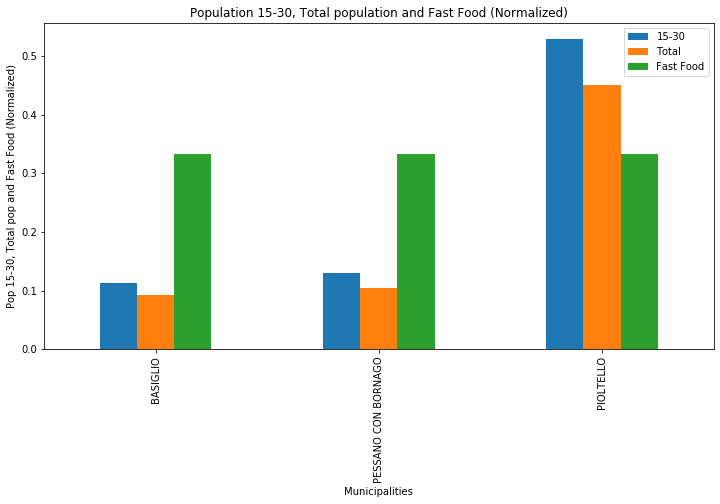

In [42]:
import matplotlib.pyplot as plt
df_popul_group_ff=df_popul_group_ff.set_index("Comune")
df_popul_group_ff=df_popul_group_ff.drop(["18-40_x","40-65_x"], axis=1)
df_popul_group_ff.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Municipalities') # add to x-label to the plot
plt.ylabel('Pop 15-30, Total pop and Fast Food (Normalized)') # add y-label to the plot
plt.title('Population 15-30, Total population and Fast Food (Normalized)') # add title to the plot

plt.show()

#### C.2 Pub & Pizza Restaurants

Considering the municipalities with the same number of fast food restaurants (2), the municipality of Pieve Emanuele has the largest population between 15 and 30 years old. The fact that it is also the largest municipality compared to the others and therefore can better absorb the opening of a new business, makes Pieve Emanuele the best choice for a new fast food restaurant.

In [43]:
# pub & pizza results
df_pop_sum_pp=df_pop_sum.rename(columns={"COMUNE":"Comune"})
milan_pp=milan_pp_pop.sort_values("18-40", ascending=False)
middle=milan_pp["18-40"]>=0.245
n_pp=milan_pp["Pub & Pizza"]<=5
milan_pp=milan_pp[middle & n_pp]
milan_pp=pd.merge(left=milan_pp, right=df_pop_sum_pp, on="Comune")
sum_pop_pp=milan_pp["Sum"]>=5000
milan_pp=milan_pp[sum_pop_pp]
milan_pp

,Comune,Pub & Pizza,15-30,18-40,40-65,Sum
1,MILANO,4,0.157774,0.270427,0.374745,1396059
3,ASSAGO,3,0.153662,0.259400,0.393067,9202
6,MELEGNANO,4,0.149627,0.251591,0.371185,18379
7,TREZZANO SUL NAVIGLIO,4,0.154016,0.248932,0.379477,21303
9,CESANO BOSCONE,4,0.162522,0.246432,0.375741,23966
10,PAULLO,3,0.158547,0.246324,0.388485,11290
11,GESSATE,4,0.153679,0.245750,0.412322,8765


In [44]:
# normalized results
df_popul_group_pp=pd.merge(left=df_popul_group, right=milan_pp_pop, on="Comune")
df_popul_group_pp=df_popul_group_pp.drop(["15-30_y","18-40_y","40-65_y"], axis=1)
df_popul_group_pp["Pub & Pizza"]=(df_popul_group_pp["Pub & Pizza"]-df_popul_group_pp["Pub & Pizza"].min())/(df_popul_group_pp["Pub & Pizza"].max()-df_popul_group_pp["Pub & Pizza"].min())

df_popul_group_pp=df_popul_group_pp.loc[ df_popul_group_pp["Comune"].str.contains("ASSAGO")|df_popul_group_pp["Comune"].str.contains("MELEGNANO")|df_popul_group_pp["Comune"].str.contains("TREZZANO SUL NAVIGLIO")|df_popul_group_pp["Comune"].str.contains("CESANO BOSCONE")|df_popul_group_pp["Comune"].str.contains("PAULLO")|df_popul_group_pp["Comune"].str.contains("GESSATE")]
df_popul_group_pp=df_popul_group_pp.rename(columns={"Sum":"Total", "18-40_x":"18-40"})
df_popul_group_pp

,Comune,15-30_x,18-40,40-65_x,Total,Pub & Pizza
5,ASSAGO,0.109660,0.114258,0.108920,0.105343,0.071429
34,CESANO BOSCONE,0.316083,0.291932,0.284837,0.287183,0.142857
51,GESSATE,0.104085,0.102494,0.108822,0.099961,0.142857
65,MELEGNANO,0.220817,0.227204,0.213563,0.218371,0.142857
80,PAULLO,0.140944,0.134151,0.134028,0.131060,0.071429
110,TREZZANO SUL NAVIGLIO,0.264997,0.261486,0.254767,0.254385,0.142857


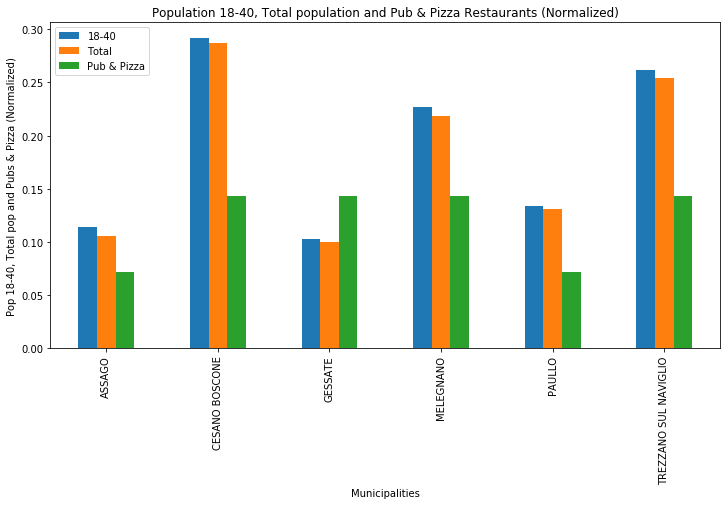

In [45]:
df_popul_group_pp=df_popul_group_pp.set_index("Comune")
df_popul_group_pp=df_popul_group_pp.drop(["15-30_x","40-65_x"], axis=1)
df_popul_group_pp.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Municipalities') # add to x-label to the plot
plt.ylabel('Pop 18-40, Total pop and Pubs & Pizza (Normalized)') # add y-label to the plot
plt.title('Population 18-40, Total population and Pub & Pizza Restaurants (Normalized)') # add title to the plot

plt.show()

In [46]:
milan_food_venues.loc[milan_food_venues["Comune"]=="CESANO BOSCONE"]

,Comune,Venue
36,CESANO BOSCONE,34


In [47]:
milan_food_venues.loc[milan_food_venues["Comune"]=="TREZZANO SUL NAVIGLIO"]

,Comune,Venue
115,TREZZANO SUL NAVIGLIO,23


#### C.3 Restaurants

In [48]:
# restaurants results
df_pop_sum_rest=df_pop_sum.rename(columns={"COMUNE":"Comune"})
milan_rest=milan_rest_pop.sort_values("40-65", ascending=False)
older=milan_rest["40-65"]>=0.415
n_rest=milan_rest["Restaurant"]<=20
milan_rest=milan_rest[older & n_rest]
milan_rest=pd.merge(left=milan_rest, right=df_pop_sum_rest, on="Comune")
sum_pop_rest=milan_rest["Sum"]>=5000
milan_rest=milan_rest[sum_pop_rest]
milan_rest

,Comune,Restaurant,15-30,18-40,40-65,Sum
4,ZIBIDO SAN GIACOMO,15,0.164977,0.239571,0.422074,6904
9,TRUCCAZZANO,9,0.152835,0.253415,0.417520,5856
10,CASOREZZO,11,0.145730,0.228378,0.417444,5469
11,BASIGLIO,18,0.179367,0.235403,0.415141,8084


In [49]:
# normalized results
df_popul_group_rest=pd.merge(left=df_popul_group, right=milan_rest_pop, on="Comune")
df_popul_group_rest=df_popul_group_rest.drop(["15-30_y","18-40_y","40-65_y"], axis=1)
#df_popul_group_rest["15-30_x"]=(df_popul_group_rest["15-30_x"]-df_popul_group_rest["15-30_x"].min())/(df_popul_group_rest["15-30_x"].max()-df_popul_group_rest["15-30_x"].min())
#df_popul_group_rest["18-40_x"]=(df_popul_group_rest["18-40_x"]-df_popul_group_rest["18-40_x"].min())/(df_popul_group_rest["18-40_x"].max()-df_popul_group_rest["18-40_x"].min())
#df_popul_group_rest["40-65_x"]=(df_popul_group_rest["40-65_x"]-df_popul_group_rest["40-65_x"].min())/(df_popul_group_rest["40-65_x"].max()-df_popul_group_rest["40-65_x"].min())
df_popul_group_rest["Restaurant"]=(df_popul_group_rest["Restaurant"]-df_popul_group_rest["Restaurant"].min())/(df_popul_group_rest["Restaurant"].max()-df_popul_group_rest["Restaurant"].min())
#df_popul_group_rest["Sum"]=(df_popul_group_rest["Sum"]-df_popul_group_rest["Sum"].min())/(df_popul_group_rest["Sum"].max()-df_popul_group_rest["Sum"].min())

df_popul_group_rest=df_popul_group_rest.loc[df_popul_group_rest["Comune"].str.contains("ZIBIDO SAN GIACOMO")|df_popul_group_rest["Comune"].str.contains("TRUCCAZZANO")|df_popul_group_rest["Comune"].str.contains("CASOREZZO")|df_popul_group_rest["Comune"].str.contains("BASIGLIO")]
df_popul_group_rest=df_popul_group_rest.rename(columns={"Sum":"Total", "40-65_x":"40-65"})
df_popul_group_rest

,Comune,15-30_x,18-40_x,40-65,Total,Restaurant
9,BASIGLIO,0.112655,0.089821,0.100398,0.091573,0.535714
28,CASOREZZO,0.058324,0.056801,0.065365,0.059365,0.285714
117,TRUCCAZZANO,0.066478,0.068666,0.070654,0.064132,0.214286
128,ZIBIDO SAN GIACOMO,0.086779,0.077249,0.085967,0.077040,0.428571


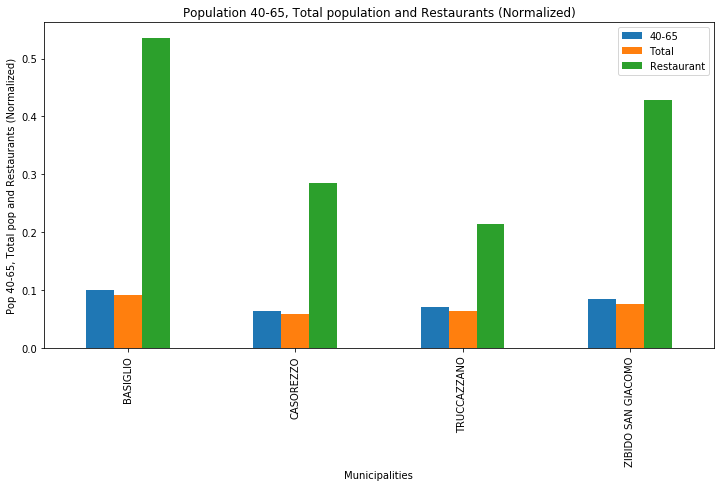

In [50]:
df_popul_group_rest=df_popul_group_rest.set_index("Comune")
df_popul_group_rest=df_popul_group_rest.drop(["15-30_x","18-40_x"], axis=1)
df_popul_group_rest.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Municipalities') # add to x-label to the plot
plt.ylabel('Pop 40-65, Total pop and Restaurants (Normalized)') # add y-label to the plot
plt.title('Population 40-65, Total population and Restaurants (Normalized)') # add title to the plot

plt.show()

In [57]:
df_results=df.loc[df["COMUNE"].str.contains("PIOLTELLO") | df["COMUNE"].str.contains("TRUCCAZZANO") | df["COMUNE"].str.contains("TREZZANO SUL NAVIGLIO")]
venue=["Fast Food","Pub/Pizza", "Restaurant"]
df_results["Venue"]=venue
df_results

C:\Users\Fabio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,COMUNE,CAP,PROVINCIA,REGIONE,LATITUDINE,LONGITUDINE,Venue
88,PIOLTELLO,20096,MI,Lombardia,45.504018,9.331134,Fast Food
115,TREZZANO SUL NAVIGLIO,20090,MI,Lombardia,45.418338,9.070732,Pub/Pizza
118,TRUCCAZZANO,20060,MI,Lombardia,45.485093,9.465839,Restaurant


In [58]:
df_results_pp=df_results.loc[df_results["Venue"]=="Pub/Pizza"]
df_results_pp

,COMUNE,CAP,PROVINCIA,REGIONE,LATITUDINE,LONGITUDINE,Venue
115,TREZZANO SUL NAVIGLIO,20090,MI,Lombardia,45.418338,9.070732,Pub/Pizza


In [59]:
df_results_ff=df_results.loc[df_results["Venue"]=="Fast Food"]
df_results_ff

,COMUNE,CAP,PROVINCIA,REGIONE,LATITUDINE,LONGITUDINE,Venue
88,PIOLTELLO,20096,MI,Lombardia,45.504018,9.331134,Fast Food


In [60]:
df_results_rest=df_results.loc[df_results["Venue"]=="Restaurant"]
df_results_rest

,COMUNE,CAP,PROVINCIA,REGIONE,LATITUDINE,LONGITUDINE,Venue
118,TRUCCAZZANO,20060,MI,Lombardia,45.485093,9.465839,Restaurant


In [61]:
address = 'Province of Milan, Italy'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_prov = folium.Map(location=[latitude, longitude], zoom_start=10)

In [62]:
for lat, lng, label, pop in zip(df_results_ff['LATITUDINE'], df_results_ff['LONGITUDINE'], df_results_ff['Venue'], df_results_ff['COMUNE']):
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        tooltip=pop,
        color='yellow',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(map_prov)  

for lat, lng, label, pop in zip(df_results_pp['LATITUDINE'], df_results_pp['LONGITUDINE'], df_results_pp['Venue'], df_results_pp['COMUNE']):
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        tooltip=pop,
        color='blue',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(map_prov)  

for lat, lng, label, pop in zip(df_results_rest['LATITUDINE'], df_results_rest['LONGITUDINE'], df_results_rest['Venue'], df_results_rest['COMUNE']):
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        tooltip=pop,
        color='red',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(map_prov)  
map_prov